In [1]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
import dlib #   !pip install dlib
from imutils import face_utils

In [2]:
# Kết nối đến Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Test_Opencv'
# Hiển thị tất cả thư mục hoặc file
os.listdir(path)

['face.jpg', 'face2.jpg', 'face3.jpg', 'face4.jpg', 'face5.jpg', 'models']

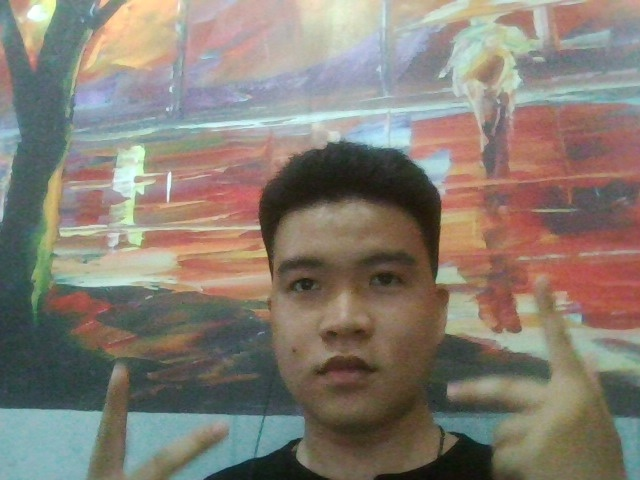

In [4]:
# Hiển thị một ảnh
img = cv2.imread(path + "/face.jpg")
cv2_imshow(img)


-0.0721484
0.221167
0.0447203
-0.0533677
-0.0525504
-0.0803721
-0.0218283
-0.1278
0.124684
-0.0736339
0.299664
-0.0832846
-0.22412
-0.0727127
-0.0165766
0.198599
-0.194479
-0.134024
-0.0686872
0.0380864
0.0868362
0.016008
0.0577672
0.0578079
-0.031748
-0.324196
-0.106871
-0.100197
0.0159976
-0.035845
-0.0544452
-0.0250843
-0.182138
-0.11607
0.00939088
0.0304447
-0.0111523
-0.087264
0.266975
-0.0518782
-0.213693
0.0461573
0.071894
0.287635
0.141476
0.0496512
0.0103279
-0.0832124
0.0974278
-0.139606
0.107932
0.0939457
0.130577
0.0307882
0.021512
-0.178289
0.052416
0.153358
-0.194425
-0.0264495
0.102027
-0.0741098
0.0106771
-0.0749528
0.27945
0.0653294
-0.0894811
-0.135822
0.122853
-0.0533077
-0.04393
0.0479358
-0.18572
-0.128386
-0.322735
0.0331437
0.3585
0.0516563
-0.172004
0.0408043
-0.0373146
-0.0204902
0.0969547
0.097692
-0.0283677
-0.00454469
-0.176131
0.0206665
0.176307
-0.0761125
-0.0582512
0.200918
-0.0308189
0.023431
0.0113294
0.024762
-0.077458
0.0438805
-0.133798
0.0485003
0.0

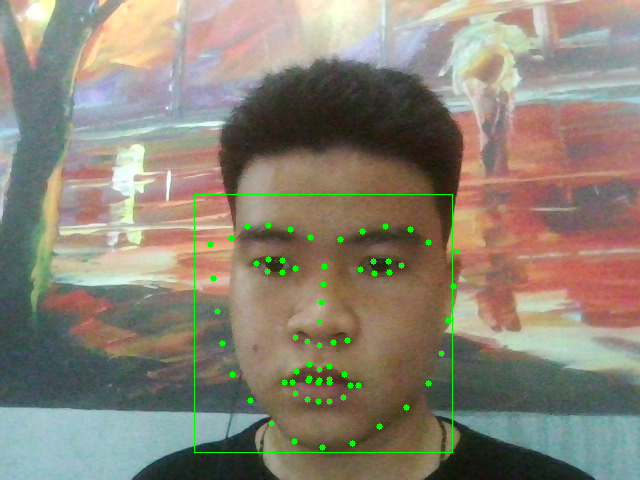

In [5]:
face_landmarks_model_path = path+ "/models/shape_predictor_68_face_landmarks.dat"
face_recognition_model_path = path+ "/models/dlib_face_recognition_resnet_model_v1.dat"
img_path = path+  "/face2.jpg"

# Tạo bộ nhận diện khuôn mặt
face_detector = dlib.get_frontal_face_detector()

# ĐỌc hình ảnh và phát hiện khuôn mặt
img = cv2.imread(img_path)

# Nhận diện các khuôn mặt bên trong ảnh
faces = face_detector(img)

# Vòng lặp qua từng khuôm mặt
for face in faces:
    point_a = face.left(), face.top()
    point_b = face.right(), face.bottom()

    # Phát hiện ra các điểm đặc trưng trên khuôn mặt
    shape_predictor = dlib.shape_predictor(face_landmarks_model_path)
    face_shape = shape_predictor(img, face)
    face_shape_array = face_utils.shape_to_np(face_shape)

     # Tính toán đặc trưng của khuôn mặt
    shape_descriptor = dlib.face_recognition_model_v1(face_recognition_model_path)
    face_descriptors = shape_descriptor.compute_face_descriptor(img, face_shape)
    print(face_descriptors)

     # Vẽ hình chữ nhật và các điểm đặc trưng lên hình ảnh
    cv2.rectangle(img, point_a, point_b, (0,255,0))
    for point in face_shape_array:
        cv2.circle(img, tuple(point), 3, (0, 255, 0), -1)

cv2_imshow(img)